##Daffa Afia Rizfazka

##1301213215

In [ ]:
!pip install mplcyberpunk

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import mplcyberpunk

In [ ]:
kota = [
    'Banda Aceh', 'Medan', 'Padang', 'Pekanbaru', 'Tanjung Pinang', 'Jambi',
    'Palembang', 'Bengkulu', 'Bandar Lampung', 'Pangkal Pinang', 'Tanjung Selor',
    'Serang', 'Bandung', 'Semarang', 'Yogyakarta', 'Surabaya', 'Pontianak',
    'Palangkaraya', 'Banjarmasin', 'Samarinda', 'Mataram', 'Kupang', 'Gorontalo',
    'Manado', 'Palu', 'Makassar', 'Kendari', 'Ambon', 'Jayapura', 'Jakarta'
]

In [ ]:
G = nx.Graph()

for kota_name in kota:
    G.add_node(kota_name)

In [ ]:
edges = [
    ('Banda Aceh', 'Medan'), ('Medan', 'Padang'), ('Padang', 'Pekanbaru'),
    ('Pekanbaru', 'Tanjung Pinang'), ('Jambi', 'Palembang'),
    ('Bandar Lampung', 'Palembang'), ('Bandar Lampung', 'Jakarta'), ('Jakarta', 'Serang'),
    ('Bandung', 'Jakarta'), ('Bandung', 'Semarang'), ('Semarang', 'Yogyakarta'),
    ('Yogyakarta', 'Surabaya'), ('Pontianak', 'Palangkaraya'), ('Palangkaraya', 'Banjarmasin'),
    ('Banjarmasin', 'Samarinda'), ('Kupang', 'Ambon'),
    ('Gorontalo', 'Manado'), ('Manado', 'Palu'), ('Makassar', 'Palu'), ('Makassar', 'Kendari'),
]

In [ ]:
G.add_edges_from(edges)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
node_size = [v * 1000 for v in degree_centrality.values()]

world = gpd.read_file("ne_110m_admin_0_countries.shp")
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [ ]:
pos = {
    'Banda Aceh': (95.316, 5.548),
    'Medan': (98.671, 3.595),
    'Padang': (100.351, -0.949),
    'Pekanbaru': (101.447, 0.507),
    'Tanjung Pinang': (104.457, 0.919),
    'Jambi': (103.617, -1.588),
    'Palembang': (104.752, -2.998),
    'Bengkulu': (102.411, -4.978),
    'Bandar Lampung': (105.268, -5.388),
    'Pangkal Pinang': (105.772, -2.208),
    'Tanjung Selor': (117.182, 2.888),
    'Serang': (106.498, -6.128),
    'Bandung': (107.617, -6.878),
    'Semarang': (110.421, -6.968),
    'Yogyakarta': (110.367, -7.798),
    'Surabaya': (112.754, -7.268),
    'Pontianak': (109.367, -0.548),
    'Palangkaraya': (113.938, -0.218),
    'Banjarmasin': (114.598, -3.318),
    'Samarinda': (117.118, -0.488),
    'Mataram': (116.108, -8.588),
    'Kupang': (123.628, -10.188),
    'Gorontalo': (123.082, 0.558),
    'Manado': (124.858, 1.588),
    'Palu': (119.848, -0.808),
    'Makassar': (119.418, -5.128),
    'Kendari': (122.568, -5.128),
    'Ambon': (128.208, -3.718),
    'Jayapura': (135.718, -3.228),
    'Jakarta': (106.845, -6.211)
}

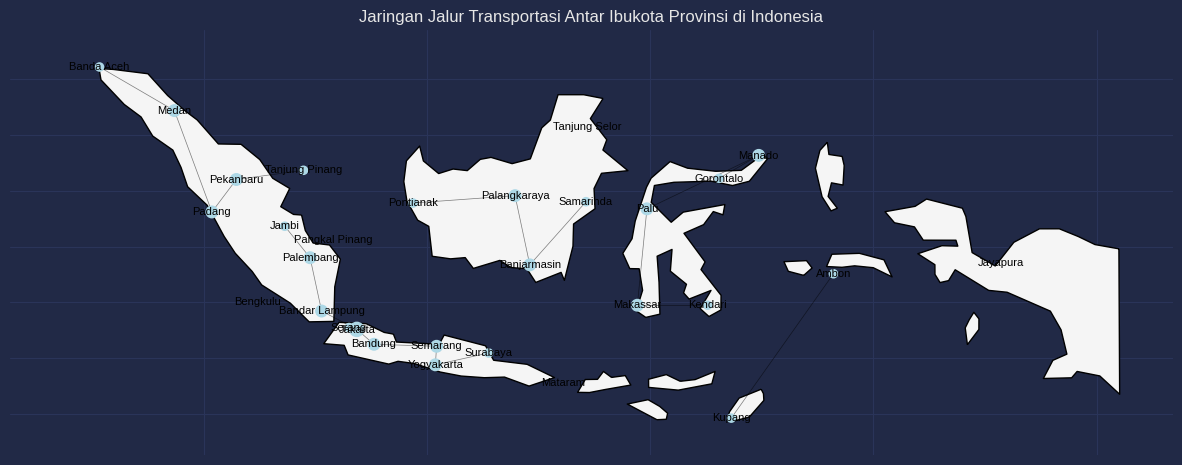

Kota-kota dengan degree centrality tinggi:
Jakarta: 0.10344827586206896
Medan: 0.06896551724137931
Padang: 0.06896551724137931
Pekanbaru: 0.06896551724137931
Palembang: 0.06896551724137931

Kota-kota dengan betweenness centrality tinggi:
Jakarta: 0.046798029556650245
Bandung: 0.03694581280788178
Bandar Lampung: 0.029556650246305417
Semarang: 0.029556650246305417
Palembang: 0.017241379310344827


In [ ]:
plt.style.use("cyberpunk")

indonesia = world[(world['NAME'] == 'Indonesia')]
fig, ax = plt.subplots(figsize=(15, 15))
indonesia.plot(ax=ax, color='whitesmoke', edgecolor='black')

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')


plt.title('Jaringan Jalur Transportasi Antar Ibukota Provinsi di Indonesia')
plt.show()

print("Kota-kota dengan degree centrality tinggi:")
for kota_name, degree in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{kota_name}: {degree}")

print("\nKota-kota dengan betweenness centrality tinggi:")
for kota_name, betweenness in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{kota_name}: {betweenness}")